# Ridge vs Lasso Coefficients magnitude comparison

The present notebook compare the evolution of the coefficients magnitude in Linear least squares with l2 regularization and Linear Model trained with L1 prior as regularizer (aka the Lasso)
It was done only as practice, and uses a train subset of Titanic dataset

In [1]:
import pandas as pd
# We can use the pandas library in python to read in the csv file.
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("train.csv")


Preprocessing data. NaN age is remplaced with median. Sex is replaced with 1/0. Embarked is originaly a string and  replace with a numeric code.  

In [2]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [3]:
print(titanic.Sex.unique())
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
print(titanic.Sex.unique())

['male' 'female']
[0 1]


In [4]:
import math
import numpy as np
print(titanic.Embarked.unique())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2
print(titanic.Embarked.unique())

['S' 'C' 'Q' nan]
[0 1 2]


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Drop string columns:

In [6]:
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [7]:
titanic.Pclass = titanic.Pclass // max(titanic.Pclass) * 891
titanic.Age = titanic.Age // max(titanic.Age) * 891
titanic.SibSp = titanic.SibSp // max(titanic.SibSp) * 891
titanic.Parch = titanic.Parch // max(titanic.Parch) * 891
titanic.Fare = titanic.Fare // max(titanic.Fare) * 891
titanic.Embarked = titanic.Embarked // max(titanic.Embarked) * 891


Fit a Ridge model with several alpha and store resultant coeficients.

In [8]:
# Import the linear regression class
from sklearn.linear_model import Ridge


# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

d = []
# Initialize our algorithm class
alphas = [0.1,1,3,30,300,3000, 30000, 300000, 3000000, 30000000, 300000000, 3000000000]
for alpha in alphas:
    alg = Ridge(alpha=alpha)
    # Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
    # We set random_state to ensure we get the same splits every time we run this.
    alg.fit(titanic[predictors], titanic.Survived)
    
    d.append(alg.coef_)
    


Define the plot function. Coeficient 1 isn't plotted in order to show small coeff.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_ranges(predictors, alphas):
    for i in range(len(predictors)):
        if i==1: ## coef. 1 is big, so we don't plot it
            continue
        vals = d
        plt.plot (alphas, [coef[i] for coef in d])
    plt.xscale('log')
      

Plot the coef. evolution for Ridge regression

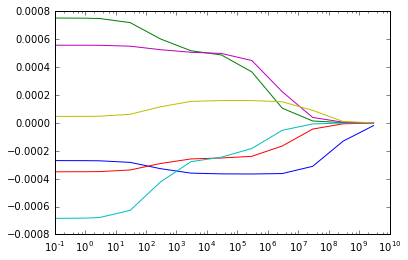

In [10]:

plot_ranges (predictors, alphas)  

Fit Lasso regression and plot coef. evolution

In [11]:
d = []
# Initialize our algorithm class

from sklearn.linear_model import Lasso
for alpha in alphas:
    alg = Lasso(alpha=alpha)
    # Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
    # We set random_state to ensure we get the same splits every time we run this.
    alg.fit(titanic[predictors], titanic.Survived)
    
    d.append(alg.coef_)

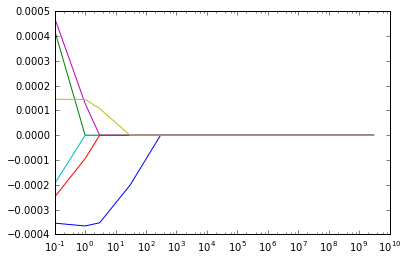

In [12]:

plot_ranges (predictors, alphas)    